# Exercise 4.9 Part 2

In [1]:
#1: Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/miguel/Documents/Instacart Basket Analysis'

In [3]:
#1: Importing file
df_ords_prods_customer = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_4_9.pkl'))

In [4]:
#3: Checking column names
df_ords_prods_customer.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Surname,Gender,State,Age,Date_Joined,number_of_dependants,Marital_Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


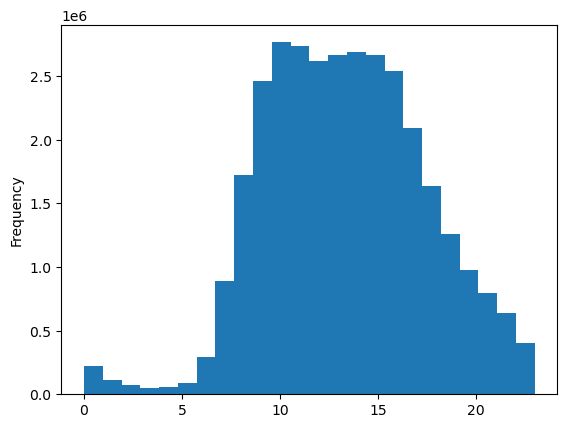

In [5]:
#3: Creating histogram for 'order_time' column
hist_hour_of_day = df_ords_prods_customer['order_time'].plot.hist(bins = 24)

#3: The histogram abve shows that most sales/orders happen in the late morning and early afternoon, usually between the hours of 8 AM and 5 PM. Between 6 PM and 7 AM (of the following day) Instacart experiences a slower period in sales. 

In [23]:
#3: Exporting histogram
hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'hist_hour_of_day.png'))

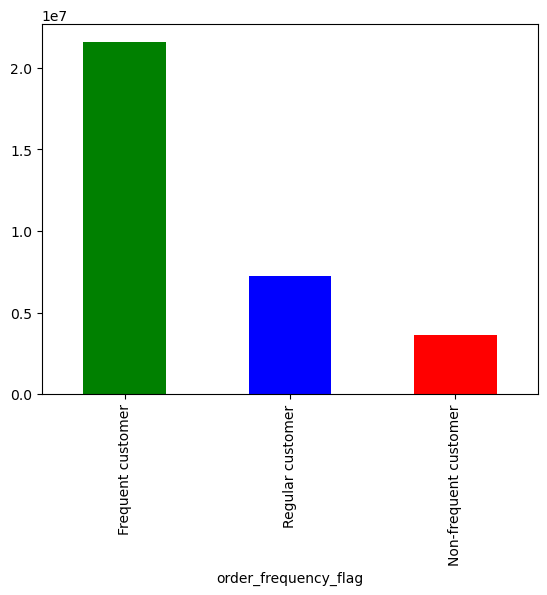

In [8]:
#4: Creating a bar chart for 'loyalty flag' column
bar_loyalty_flag = df_ords_prods_customer['order_frequency_flag'].value_counts().plot.bar(color =['green', 'blue', 'red'])

In [24]:
#4: Exporting bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [9]:
#5: Creating a random data sample
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_customer)) <= 0.7

In [10]:
#5: Checking work
dev

array([False,  True, False, ..., False,  True,  True])

In [11]:
#5: Splitting dataframe into big and small
big = df_ords_prods_customer[dev]
small = df_ords_prods_customer[~dev]

In [12]:
#5: Checking size
len(df_ords_prods_customer)

32434212

In [13]:
#5: Checking size
len(big) + len(small)

32434212

In [15]:
#5: Working with the samples
df_ords_prods_customer_2 = small[['order_time', 'prices']]

/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

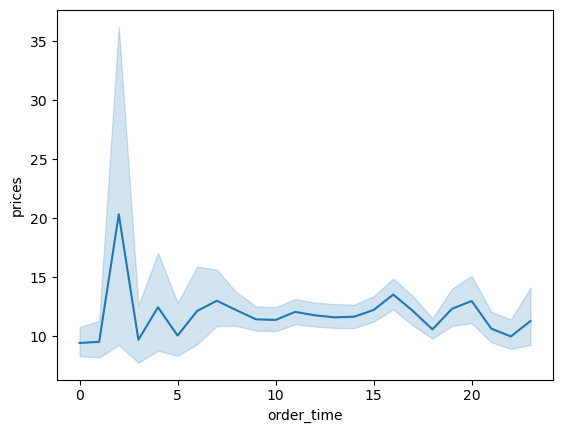

In [16]:
#5: Creating the line graph
line_hour_of_day = sns.lineplot(data = df_ords_prods_customer_2, x = 'order_time', y = 'prices')

In [25]:
#5: Exporting line graph
line_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day.png'))

In [17]:
#6: Working with the samples
df_ords_prods_customer_3 = small[['Age', 'number_of_dependants']]

/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

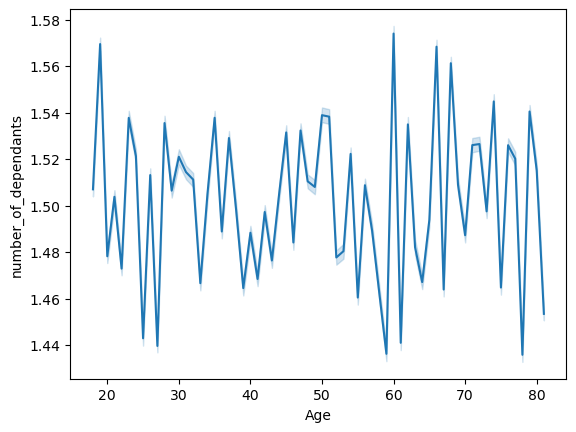

In [20]:
#6: Creating line graph
line_age_n_dependents = sns.lineplot(data = df_ords_prods_customer, x = 'Age', y = 'number_of_dependants')

#6: From the line graph, there does not seem to be a correlation between the number of dependants one has and one's age.

In [26]:
#6: Exporting line graph
line_age_n_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_n_dependents.png'))

In [21]:
#7: Working with sample
df_ords_prods_customer_4 = small[['Age', 'Income']]

/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


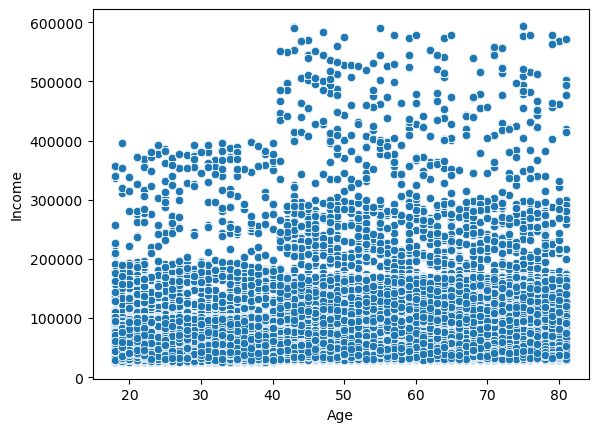

In [22]:
#7: Creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'Income', data = df_ords_prods_customer_4)

#7: The scatterplot shows that most people, regardless of age, usually have an income at or below $20,000 per year. Between the ages of 20 and 40 there are less outliers (people that make more than $20k) but after 40, there is an increase in average income, as there are more outliers. This shows that there is a positive correlation between age and income from the Instacart customers.

In [27]:
#7: Exporting scatterplot
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))